<a href="https://colab.research.google.com/github/SUMIT74184/Machine-learning-journey/blob/main/tensorflow_coffee_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
np.random.seed(1)
tf.random.set_seed(1)

In [22]:
X=np.array([
    [210.0, 14.0],
    [230.0, 12.0],
    [250.0, 13.5],
    [180.0, 11.8],
    [284.99, 15.45],
    [151.32, 11.51]
], dtype=np.float32)

y=np.array([1,1,1,0,1,0])

In [23]:
#shuffle
perm=np.random.permutation(len(X))
X=X[perm]
y=y[perm]

In [24]:
norm=tf.keras.layers.Normalization(axis=-1)
norm.adapt(X)
#learns mean & variance

In [25]:
H=8
inputs=tf.keras.Input(shape=(2,),dtype=tf.float32, name="inputs")
x=norm(inputs,training=False)
x=tf.keras.layers.Dense(H,activation="sigmoid",name="hidden")(x)
outputs=tf.keras.layers.Dense(1,activation="sigmoid",name="outputs")(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs,name="coffee_mlp")

In [26]:
#compile
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name="accuracy")]
)

In [27]:
#Train the model(small epochs for demo)
history=model.fit(X,y, epochs=200,batch_size=2,verbose=0)

In [28]:
#diagnostics
loss=history.history['loss'][-1]
acc=history.history['accuracy'][-1]
print(f"final loss : {loss:.4f} final acc:{acc:.3f}")

final loss : 0.0658 final acc:1.000


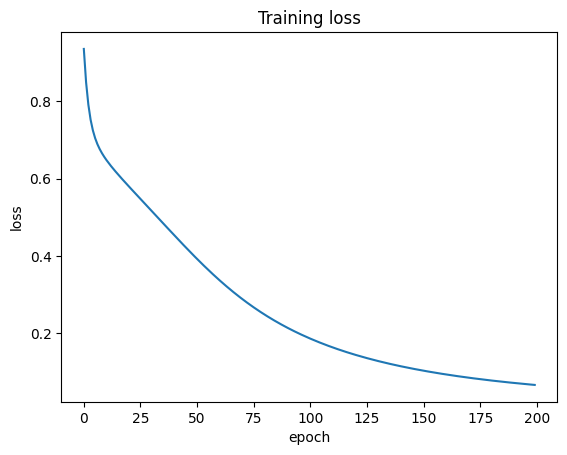

In [29]:
#plot loss
plt.plot(history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Training loss")
plt.show()

In [34]:
#Inspect learned parameters (weights & biases)
W1,b1=model.get_layer("hidden").get_weights()
W2,b2=model.get_layer("outputs").get_weights()

print("W1 shape:", W1.shape, "b1 shape:", b1.shape)
print("W2 shape:", W2.shape, "b2 shape:", b2.shape)
print("W1 (temperature,duration -> hidden units):\n", W1)
print("b1:\n", b1)
print("W2:\n", W2.T)
print("b2:\n", b2)

W1 shape: (2, 8) b1 shape: (8,)
W2 shape: (8, 1) b2 shape: (1,)
W1 (temperature,duration -> hidden units):
 [[-0.24246705 -0.57456803  1.4108163   2.1947436  -0.29208368 -0.75498533
  -1.3845849   1.1339809 ]
 [-0.46899092 -0.70725733  1.2669505   0.7403387  -0.1698222  -0.6913845
  -0.05964221  0.4461005 ]]
b1:
 [-0.02163924 -0.09325941  0.5737505   0.7803403   0.03524489 -0.1175353
 -0.12526709  0.10783233]
W2:
 [[-0.48828802 -0.986988    2.3951457   2.9736357  -0.2788753  -1.1335441
  -1.3204464   1.2313739 ]]
b2:
 [0.14851153]


In [35]:
raw_example=np.array([[210.0,14.0]],dtype=np.float32)

In [36]:
# 6a using the model
pred_model=model.predict(raw_example,verbose=0).reshape(-1)[0]

In [37]:
# 6b manual way :normalize->dense->sigmoid->dense->sigmoid
normalized=norm(raw_example)
a_in=normalized.numpy().reshape(-1)

In [39]:
def sigmoid(z):
    z=np.clip(z,-500,500)
    return 1.0/(1.0+np.exp(-z))

In [40]:
# hidden
z1 = np.dot(a_in, W1) + b1        # (H,)
a1 = sigmoid(z1)

In [41]:
z2=np.dot(a1,W2).reshape(-1)+b2

In [42]:
a2=sigmoid(z2)[0]

In [43]:
print("model predict",float(pred_model))

model predict 0.949164867401123


In [44]:
print("manual predict",float(a2))

manual predict 0.949164867401123


In [45]:
mean=norm.mean.numpy()

In [46]:
var=norm.variance.numpy()
std=np.sqrt(var)

In [48]:
print("mean",mean,"std",std)

mean [[217.71834   13.043334]] std [[43.987507   1.4083875]]
